In [24]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model_mlp import MLP
import pandas as pd
### Preparation ####

# set random seed
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)

# set precision and device
torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Load dataset from CSV files
train_data = pd.read_csv('./data/train_data.csv')
test_data = pd.read_csv('./data/test_data.csv')

# Extract input features and labels from the loaded data
inputs_train = train_data[['X0', 'X1', 'X2', 'X3']].values
labels_train = train_data['target'].values
inputs_test = test_data[['X0', 'X1', 'X2', 'X3']].values
labels_test = test_data['target'].values

# Convert to PyTorch tensors
inputs_train = torch.tensor(inputs_train, dtype=torch.float64, requires_grad=True).to(device)
labels_train = torch.tensor(labels_train, dtype=torch.float64, requires_grad=True).to(device)
inputs_test = torch.tensor(inputs_test, dtype=torch.float64, requires_grad=True).to(device)
labels_test = torch.tensor(labels_test, dtype=torch.float64, requires_grad=True).to(device)


def l1(model):
    l1_reg = torch.tensor(0.).to(device)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return l1_reg

shp = [4,10,10,10,1] 
model = MLP(shp=shp).to(device)

### Training ###

optimizer = torch.optim.AdamW(model.parameters(), lr=0.1, weight_decay=0.01)
steps = 5001
log = 200
lamb = 1e-4


train_accuracies = []
test_accuracies = []

train_losses=[]
test_losses=[]
for step in range(steps):
    optimizer.zero_grad()
    pred_train = model(inputs_train)
    loss_train = torch.mean((pred_train-labels_train)**2)

    acc_train = torch.mean((abs(pred_train - labels_train) < 0.01).long().float())
    pred_test = model(inputs_test)
    loss_test = torch.mean((pred_test-labels_test)**2)
    acc_test = torch.mean((abs(pred_test - labels_test) < 0.01).long().float())



    reg = l1(model)
    loss = loss_train + lamb * reg

    loss.backward()
    optimizer.step()

    if step % log == 0:
        print("step = %d | train loss: %.2e | test loss %.2e | train acc: %.2e | test acc: %.2e | reg: %.2e "%(step, loss_train.cpu().detach().numpy(), loss_test.cpu().detach().numpy(), acc_train.cpu().detach().numpy(), acc_test.cpu().detach().numpy(), reg.cpu().detach().numpy()))
        train_accuracies.append(acc_train.cpu().detach().numpy())
        test_accuracies.append(acc_test.cpu().detach().numpy())

        train_losses.append(loss_train.cpu().detach().numpy())
        test_losses.append(loss_test.cpu().detach().numpy())
torch.save(model.state_dict(), './model_mlp')

cpu
step = 0 | train loss: 6.02e+05 | test loss 6.06e+05 | train acc: 1.49e-06 | test acc: 2.38e-05 | reg: 4.69e+01 
step = 200 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 1.49e-06 | test acc: 0.00e+00 | reg: 1.24e+02 
step = 400 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 0.00e+00 | test acc: 0.00e+00 | reg: 1.05e+02 
step = 600 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 0.00e+00 | test acc: 0.00e+00 | reg: 9.47e+01 
step = 800 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 1.49e-06 | test acc: 0.00e+00 | reg: 8.31e+01 
step = 1000 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 1.49e-06 | test acc: 0.00e+00 | reg: 7.14e+01 
step = 1200 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 8.95e-06 | test acc: 0.00e+00 | reg: 2.18e+02 
step = 1400 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 0.00e+00 | test acc: 0.00e+00 | reg: 3.70e+02 
step = 1600 | train loss: 6.02e+05 | test loss 6.05e+05 | train acc: 0.00e+

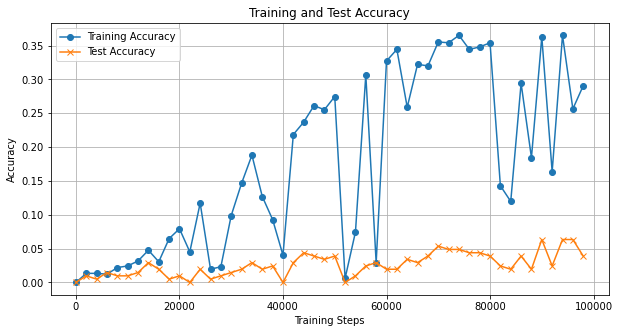

Final test accuracy: 9.66e-01


In [3]:
x_values = range(0, steps, log)

# Plot the training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(x_values[:len(train_accuracies)], train_accuracies, label='Training Accuracy', marker='o')
plt.plot(x_values[:len(test_accuracies)], test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.grid()
plt.show()

# Test the final model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    pred_final_test = model(inputs_test)
    acc_final_test = torch.mean(((pred_final_test - 0.5) * (labels_test - 0.5) > 0).long().float())
    print("Final test accuracy: %.2e" % acc_final_test.cpu().detach().numpy())

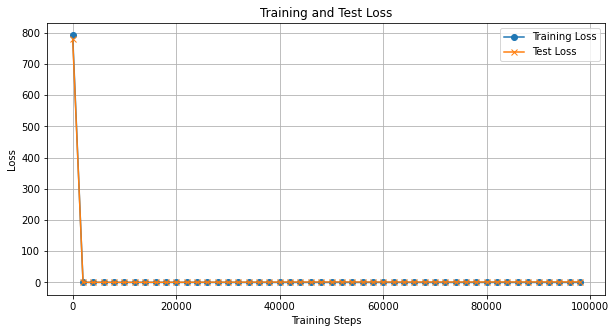

Final test accuracy: 9.66e-01


In [4]:
x_values = range(0, steps, log)

# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(x_values[:len(train_losses)], train_losses, label='Training Loss', marker='o')
plt.plot(x_values[:len(test_losses)], test_losses, label='Test Loss', marker='x')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.grid()
plt.show()

# Test the final model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    pred_final_test = model(inputs_test)
    acc_final_test = torch.mean(((pred_final_test - 0.5) * (labels_test - 0.5) > 0).long().float())
    print("Final test accuracy: %.2e" % acc_final_test.cpu().detach().numpy())

ValueError: x and y must be the same size

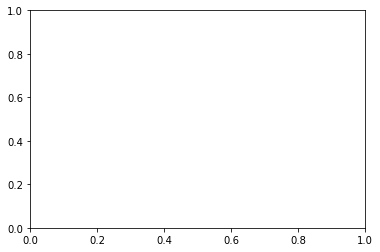

In [5]:
# model.eval()
# with torch.no_grad():
#     pred_final_test = model(inputs_test)
#     plt.scatter(inputs_test.detach().numpy().squeeze(),pred_final_test.detach().numpy().squeeze())
#     x = np.linspace(0,2*np.pi, 100)
#     plt.plot(x, np.sin(x), label="True Curve", color='r')
#     plt.legend()
#     plt.show()
    